In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def logGaborKernels(kernelSize, num_orientations, num_scales):
    meshRange = np.arange(-kernelSize/2, kernelSize/2 + kernelSize%2)
    
    x, y = np.meshgrid(meshRange,meshRange)
    
    rho = np.log2(np.sqrt(x**2+y**2))
    theta = np.arctan2(y,x)
    
    scales = [a for a in range(num_scales)]
    
    #Orientation Component
    ts = np.asarray([[a + 0.5*((b+1)%2) for a in range(2*num_orientations)] for b in scales])
    theta_st = np.pi*ts/num_orientations
    
    #I don't really know how this works but it fixes the distortion
    costheta = np.cos(theta)
    sintheta = np.sin(theta)
    ds = [[sintheta * np.cos(c_angle) - costheta * np.sin(c_angle) for c_angle in c_scale] for c_scale in theta_st]  
    dc = [[costheta * np.cos(c_angle) + sintheta * np.sin(c_angle) for c_angle in c_scale] for c_scale in theta_st]
    dtheta = np.arctan2(ds,dc)
    
    sig_theta = 0.996*(np.pi/(np.sqrt(2)*num_orientations))
    
    orientation = np.exp(-0.5*((dtheta/sig_theta)**2))
    
    #Frequency Component
    rho_s = [np.log2(kernelSize)-a for a in range(num_scales)]
    sig_rho = 0.996*np.sqrt(2/3)
    
    frequency = [np.exp(-0.5*((rho-a)/sig_rho)**2) for a in rho_s]
    
    
    out = []
    for c_s in scales:
        for c_o in range(orientation.shape[1]):
            out.append(frequency[c_s]*orientation[c_s,c_o])
    
    return np.asarray(out)

<ipython-input-4-92e5409f2bf6>:6: RuntimeWarning: divide by zero encountered in log2
  rho = np.log2(np.sqrt(x**2+y**2))


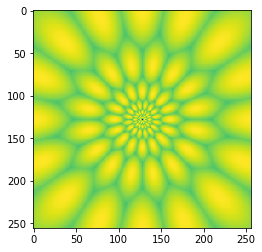

In [5]:
plt.imshow(np.max(logGaborKernels(256,8,10),0))

In [12]:
kernelSize = 64

meshRange = np.arange(-kernelSize/2, kernelSize/2 + kernelSize%2)
x, y = np.meshgrid(meshRange,meshRange)

In [23]:
y[np.where(np.logical_and(x==0,y==0))]

array([0.])

In [10]:
x[x==0]

array([], dtype=float64)